<a href="https://colab.research.google.com/github/CoderNeo17/Physics_projects/blob/main/SatelliteSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For the satellite to be in a circular orbit ;    
                mv²/r=GMm/r²;     
                   v=√(GM/r);   
                    v=7616.56m/s
                    T=2⫪(R+h)/v  
                    T=5668.15

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

u=3.986e14    #gravitational parameter of earth
R=6.371e6     #radius of earth
x0=5e5+R
y0=0.0
vx0=0.0
vy0=math.sqrt(u/x0)
state=np.array([x0,y0,vx0,vy0]) #initial state for circular orbit
stateH=np.array([x0,y0,vx0,vy0*1.1]) #initial state with higher velocity
stateL=np.array([x0,y0,vx0,vy0*0.5])  #initial state with lower velocity
T=5668.14751

def rad(x,y):  #radial distance
  return math.sqrt(x*x+y*y)

def rates(state,t):
  x,y,vx,vy=state
  r=rad(x,y)

  sin=y/r
  cos=x/r

  ax=-(u/(r*r))*cos
  ay=-(u/(r*r))*sin

  roc=np.array([vx,vy,ax,ay])
  return roc

t_list=np.linspace(0,10000,10000)
sol=odeint(rates,state,t_list)
solH=odeint(rates,stateH,t_list)
solL=odeint(rates,stateL,t_list)

x_list=sol[:,0]
y_list=sol[:,1]
vx_list=sol[:,2]
vy_list=sol[:,3]

x_listH=solH[:,0]
y_listH=solH[:,1]
vx_listH=solH[:,2]
vy_listH=solH[:,3]

x_listL=solL[:,0]
y_listL=solL[:,1]
vx_listL=solL[:,2]
vy_listL=solL[:,3]

Determining time period:

In [ ]:
for t in range(9999):
  if y_list[t+1]>0 and y_list[t]<0:
    tp=t+(y_list[t+1]/vy0)
    break

print("Simulated Time Period=",tp)
print("Error=",(tp-T)/100,"%")

for t in range(9999):
  if y_listH[t+1]>0 and y_listH[t]<0:
    tp=t+(y_listH[t+1]/(vy0*1.1))
    break

print("Simulated Time Period for a satellite with velocity higher than circular orbit=",tp)

for t in range(9999):
  if y_listL[t+1]>0 and y_listL[t]<0:
    tp=t+(y_listL[t+1]/vy0)
    break

print("Simulated Time Period for a satellite with velocity lower than circular orbit=",tp)

Simulated Time Period= 5667.41916847169
Error= -0.007283415283100112 %
Simulated Time Period for a satellite with velocity higher than circular orbit= 8071.447896128999
Simulated Time Period for a satellite with velocity lower than circular orbit= 2448.4174317444304


Simulated Visualisation of Orbit:

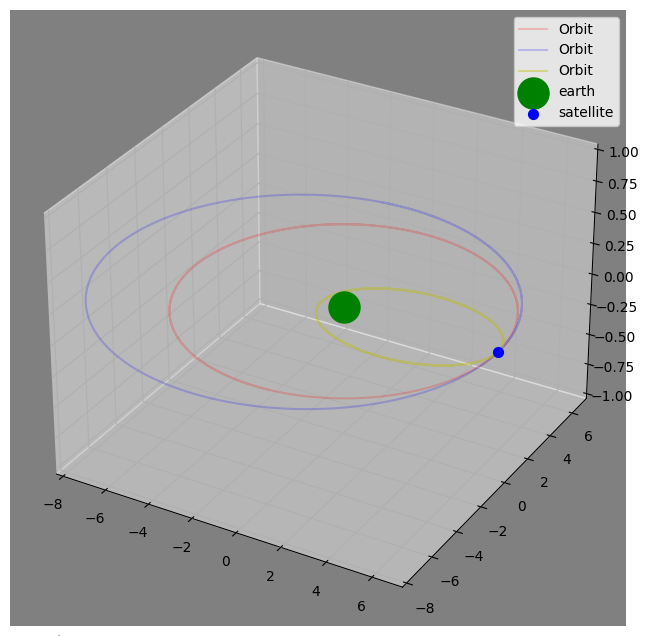

In [ ]:
fig=plt.figure(figsize=(8.0,8.0))
ax=plt.axes(projection='3d')
ax.set_facecolor('grey')
ax.set_xlim3d(-8e6,7e6)
ax.set_ylim3d(-8e6,7e6)
ax.set_zlim3d(-1,1)
ax.plot3D(x_list,y_list,0,c="r",label="Orbit",alpha=0.2)
ax.plot3D(x_listH,y_listH,0,c="b",label="Orbit",alpha=0.2)
ax.plot3D(x_listL,y_listL,0,c="y",label="Orbit",alpha=0.4)
ax.scatter3D(0,0,0,c="g",s=500,alpha=1,label="earth")
ax.scatter3D(x0,0,0,c="b",s=50,label="satellite")
plt.legend()
plt.show()

Plotting the velocity:

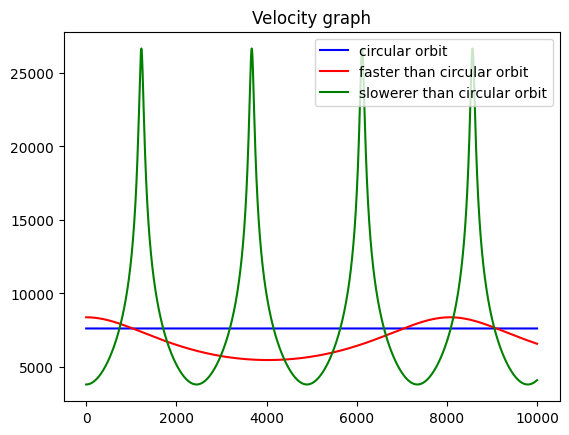

In [ ]:
v_list=[]
v_listH=[]
v_listL=[]

for n in range(10000):
  v=math.sqrt(vx_list[n]**2+vy_list[n]**2)
  vH=math.sqrt(vx_listH[n]**2+vy_listH[n]**2)
  vL=math.sqrt(vx_listL[n]**2+vy_listL[n]**2)
  v_list.append(v)
  v_listH.append(vH)
  v_listL.append(vL)

plt.title("Velocity graph")
plt.plot(t_list,v_list,"b",label="circular orbit")
plt.plot(t_list,v_listH,"r",label="faster than circular orbit")
plt.plot(t_list,v_listL,"g",label="slowerer than circular orbit")
plt.legend()
plt.show()

Plotting Kinetic and Potential energies:

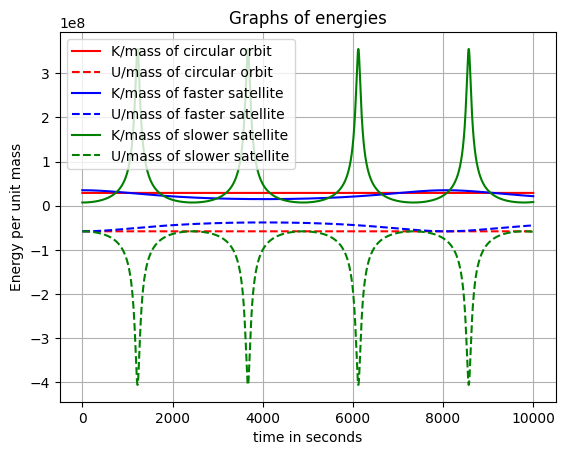

In [ ]:
K_list=[]
U_list=[]
K_listH=[]
U_listH=[]
K_listL=[]
U_listL=[]

for n in range(10000):
  K_list.append((v_list[n]**2)/2)
  U_list.append(-(u/rad(x_list[n],y_list[n])))
  K_listH.append((v_listH[n]**2)/2)
  U_listH.append(-(u/rad(x_listH[n],y_listH[n])))
  K_listL.append((v_listL[n]**2)/2)
  U_listL.append(-(u/rad(x_listL[n],y_listL[n])))

plt.title("Graphs of energies")
plt.plot(t_list,K_list,"r",label="K/mass of circular orbit")
plt.plot(t_list,U_list,"r--",label="U/mass of circular orbit")
plt.plot(t_list,K_listH,"b",label="K/mass of faster satellite")
plt.plot(t_list,U_listH,"b--",label="U/mass of faster satellite")
plt.plot(t_list,K_listL,"g",label="K/mass of slower satellite")
plt.plot(t_list,U_listL,"g--",label="U/mass of slower satellite")
plt.xlabel("time in seconds")
plt.ylabel("Energy per unit mass")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#import matplotlib.animation as animation
#X=[]
#Y=[]
#Z=[]
#fig=plt.figure()
#ax=plt.axes(projection="3d")
#def update(i):
#  ax.clear()
#  X.append(x_list[i])
#  Y.append(y_list[i])
#  Z.append(0)
#  ax.set_xlim3d(-7e6,7e6)
#  ax.set_ylim3d(-7e6,7e6)
#  ax.set_zlim3d(-1,1)
#  ax.plot3D(X,Y,0,"r",label="Orbit",alpha=0.2)
#  ax.scatter3D(x_list[i],y_list[i],0,c="b",s=50,label="satellite")
#  plot=ax.scatter3D(0,0,0,c="g",s=500,alpha=1,label="earth")
#  ax.legend()
#  return plot

#anim=animation.FuncAnimation(fig,update,frames=10000,interval=3)
#anim.save("orbit.mp4")
#ax.grid()
#plt.show() #showing didn't work. so i saved the animation as a video file
#the process of converting the animation into a mp4 file takes large amount of time and thus I commented out this section